In [254]:
import numpy as np
import pandas as pd
import sqlite3
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
mydb = mysql.connector.connect(host='localhost', port='3306', user='root', passwd='Samsungstar@5', db="Football", auth_plugin='mysql_native_password', buffered=True)

In [20]:
mycursor = mydb.cursor()

In [21]:
mycursor.execute("SHOW DATABASES")

for x in mycursor:
    print(x)

('Football',)
('information_schema',)
('mysql',)
('performance_schema',)
('sys',)


In [22]:
mycursor.execute("SHOW TABLES")

In [23]:
for x in mycursor:
    print(x)

('country',)
('league',)
('match',)
('player_attributes',)
('players',)
('teams',)


In [24]:
a = mycursor.execute("SELECT CASE WHEN ROUND(height)<165 then 165 WHEN ROUND(height)>195 then 195 ELSE ROUND(height) END AS calc_height, COUNT(height) AS distribution,  (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating, (avg(PA_Grouped.avg_potential)) AS avg_potential, AVG(weight) AS avg_weight  FROM PLAYERS LEFT JOIN (SELECT Player_Attributes.player_id,  avg(Player_Attributes.overall_rating) AS avg_overall_rating, avg(Player_Attributes.potential) AS avg_potential   FROM Player_Attributes GROUP BY Player_Attributes.player_id)  AS PA_Grouped ON PLAYERS.player_api_id = PA_Grouped.player_id GROUP BY calc_height ORDER BY calc_height")
mycursor.execute(a)
myresult = mycursor.fetchall()
players_height = pd.DataFrame(myresult, columns=['calc_height','distribution','avg_overall_rating','avg_potential','avg_weight'])
players_height = players_height.reset_index(drop=True)
plt.figure(figsize=(10,7))
plt.plot(players_height['calc_height'], players_height['avg_overall_rating'])
plt.xlabel('Calculated Height') 
plt.ylabel('Over All Rating')
plt.title("Potential vs Height")

How does the calculated height of players impact their average overall rating in the dataset?

Text(0.5, 1.0, 'Potential vs Height')

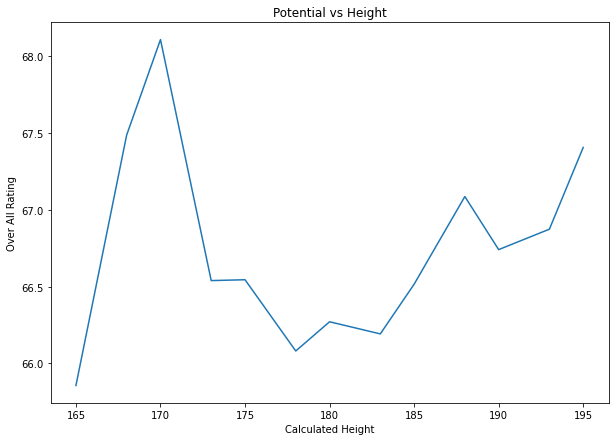

In [158]:
b = mycursor.execute("SELECT preferred_foot, AVG(overall_rating) AS average_rating FROM player_attributes GROUP BY preferred_foot")
mycursor.execute(b)
myresult1 = mycursor.fetchall()
Query2 = pd.DataFrame(myresult1, columns=['Preferred Foot', 'Average Rating']).reset_index(drop=True)
Query2 = Query2.iloc[:2,:2]
plt.figure(figsize=(10,6))
plt.bar(Query2['Preferred Foot'], Query2['Average Rating'], width = 0.4)
plt.xlabel('Preferred Foot')
plt.ylabel('Rating')
plt.title("Potential vs Height")


Text(0.5, 1.0, 'Potential vs Height')

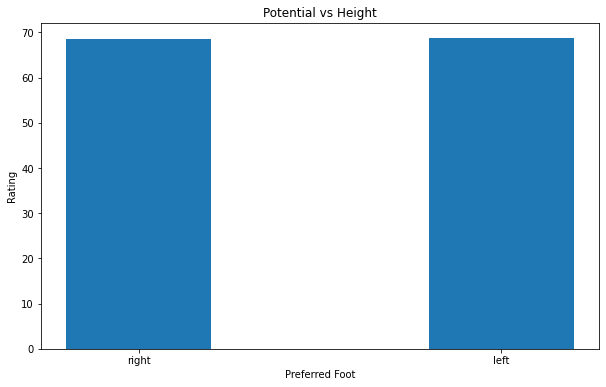

In [152]:
d = mycursor.execute("Select overall_rating, finishing from player_attributes having overall_rating > 0 and finishing > 50 ")
mycursor.execute(d)
myresult3 = mycursor.fetchall()
Query2 = pd.DataFrame(myresult3, columns =['Overall Rating', 'Finishing']).reset_index(drop = True)


In [153]:
q3 = pd.DataFrame(Query2['Overall Rating'], Query2['Finishing'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

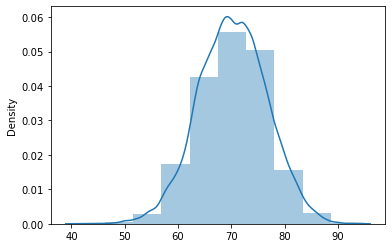

In [156]:
sns.distplot(x = Query2['Overall Rating'], bins = 10)

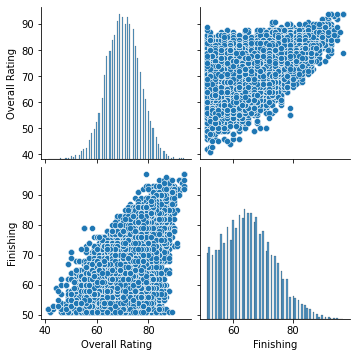

In [157]:
sns.pairplot(Query2)

<AxesSubplot:ylabel='Finishing'>

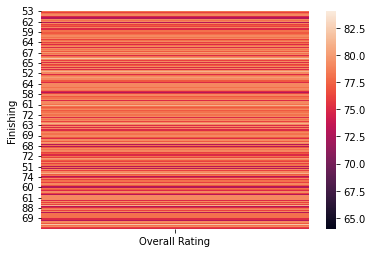

In [154]:
sns.heatmap(q3 , xticklabels='auto', yticklabels='auto')

<AxesSubplot:xlabel='Finishing', ylabel='Overall Rating'>

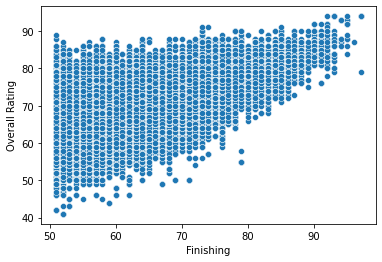

In [155]:
sns.scatterplot(x='Finishing', y='Overall Rating', data=Query2)

In [173]:
e = mycursor.execute("Select overall_rating, preferred_foot, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, stamina, strength, interceptions from player_attributes")
mycursor.execute(e)
myresult4 = mycursor.fetchall()
Query3 = pd.DataFrame(myresult4, columns = ["overall_rating", "preferred_foot", "crossing", "finishing", "heading_accuracy", "short_passing", "volleys", "dribbling", "stamina", "strength", "interceptions"])



<AxesSubplot:>

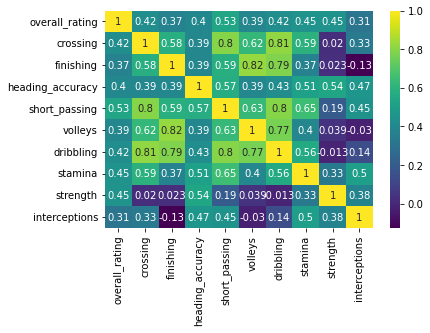

In [175]:
sns.heatmap(Query3.corr(), annot = True, cmap = 'viridis')

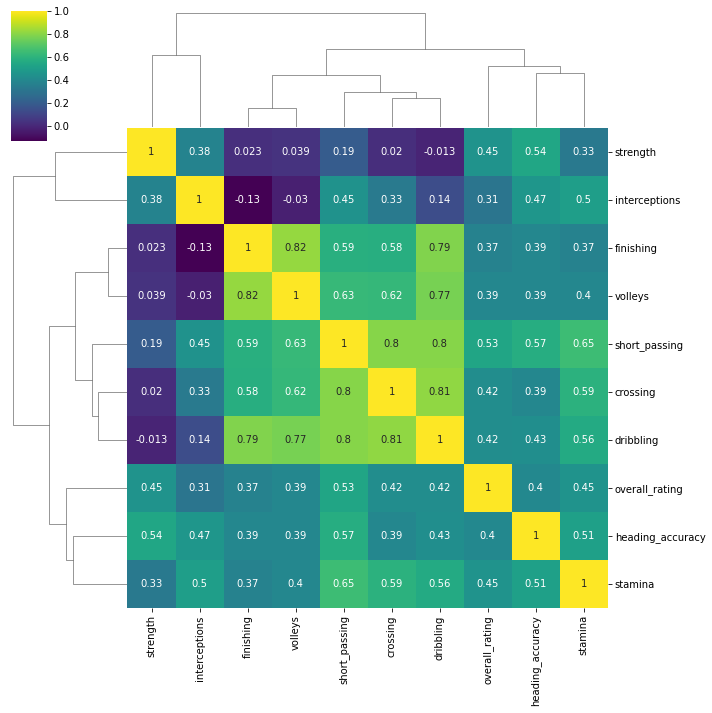

In [177]:
sns.clustermap(Query3.corr(), annot=True,cmap='viridis')

The x-label and y-label are the same but they harmonized differently. That is because they are grouped according to their similarity.
The flow-chart like structure at the top and left describe their degree of similarity.
Cluster maps use Hierarchical clustering to form different clusters.

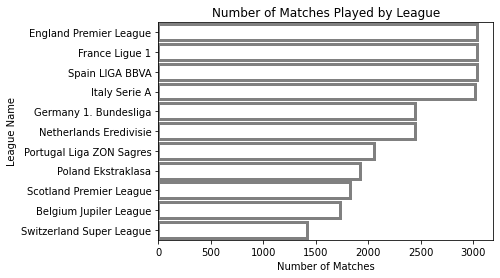

In [322]:
query = """
SELECT l.league_name, COUNT(m.match_id) AS num_matches 
FROM league l 
JOIN `Match` m ON l.league_id = m.league_id 
GROUP BY l.league_name 
ORDER BY num_matches DESC
"""

# Execute the query
mycursor.execute(query)
myresult = mycursor.fetchall()

# Convert the result to a DataFrame
df = pd.DataFrame(myresult, columns=['Name', 'Number of Match'])

# Create a horizontal bar chart
sns.barplot(x='Number of Match', y='Name', data=df, capsize=.4, errcolor=".5", linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))

# Set the axis labels and title
plt.xlabel('Number of Matches')
plt.ylabel('League Name')
plt.title('Number of Matches Played by League')

# Display the chart
plt.show()


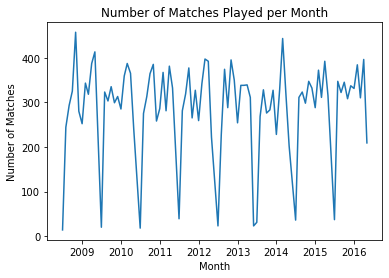

In [275]:
g = mycursor.execute('SELECT DATE_FORMAT(m.match_date, "%Y-%m") AS month, COUNT(m.match_id) AS num_matches FROM `Match` m GROUP BY month ORDER BY month Desc')
mycursor.execute(g)
myresult6 = mycursor.fetchall()
df = pd.DataFrame(myresult6, columns=['month', 'num_matches'])

# Convert the 'month' column to a datetime object and set it as the index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Create the time series plot
sns.lineplot(x = "month", y = "num_matches", data = df)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played per Month')

# Display the plot
plt.show()

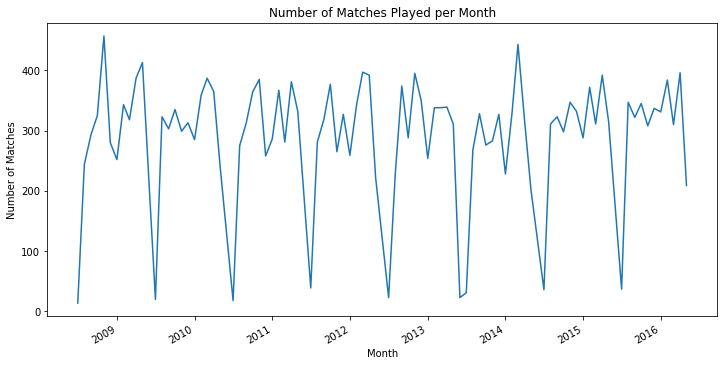

In [321]:
# Execute the SQL query
mycursor.execute('SELECT DATE_FORMAT(m.match_date, "%Y-%m") AS month, COUNT(m.match_id) AS num_matches FROM `Match` m GROUP BY month ORDER BY month DESC')

# Fetch the results and store them in a pandas dataframe
df = pd.DataFrame(mycursor.fetchall(), columns=['month', 'num_matches'])

# Convert the 'month' column to a datetime object and set it as the index
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)

# Create the time series plot using pandas plot function
ax = df.plot(kind='line', figsize=(12, 6), legend=None)

# Add axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Matches')
ax.set_title('Number of Matches Played per Month')

# Display the plot
plt.show()


h = mycursor.execute("""
    SELECT Distinct(t.team_long_name), COUNT(m.match_id) AS num_matches, SUM(CASE WHEN m.home_team_goal > m.away_team_goal AND m.home_team_id = t.team_id THEN 1 WHEN m.away_team_goal > m.home_team_goal AND m.away_team_id = t.team_id THEN 1 ELSE 0 END) AS num_wins
    FROM teams t
    LEFT JOIN `Match` m ON t.team_id = m.home_team_id OR t.team_id = m.away_team_id
    GROUP BY t.team_long_name
    ORDER BY num_matches DESC, num_wins DESC Limit 20;
""")
mycursor.execute(h)
myresult8 = mycursor.fetchall()
myresult8 = pd.DataFrame(myresult8, columns=['Team', 'num_matches','num_wins'])

myresult8.columns

/var/folders/79/vzbflgns5357xhzs356s30q00000gn/T/ipykernel_51772/2997067377.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['team_long_name'], rotation=90)


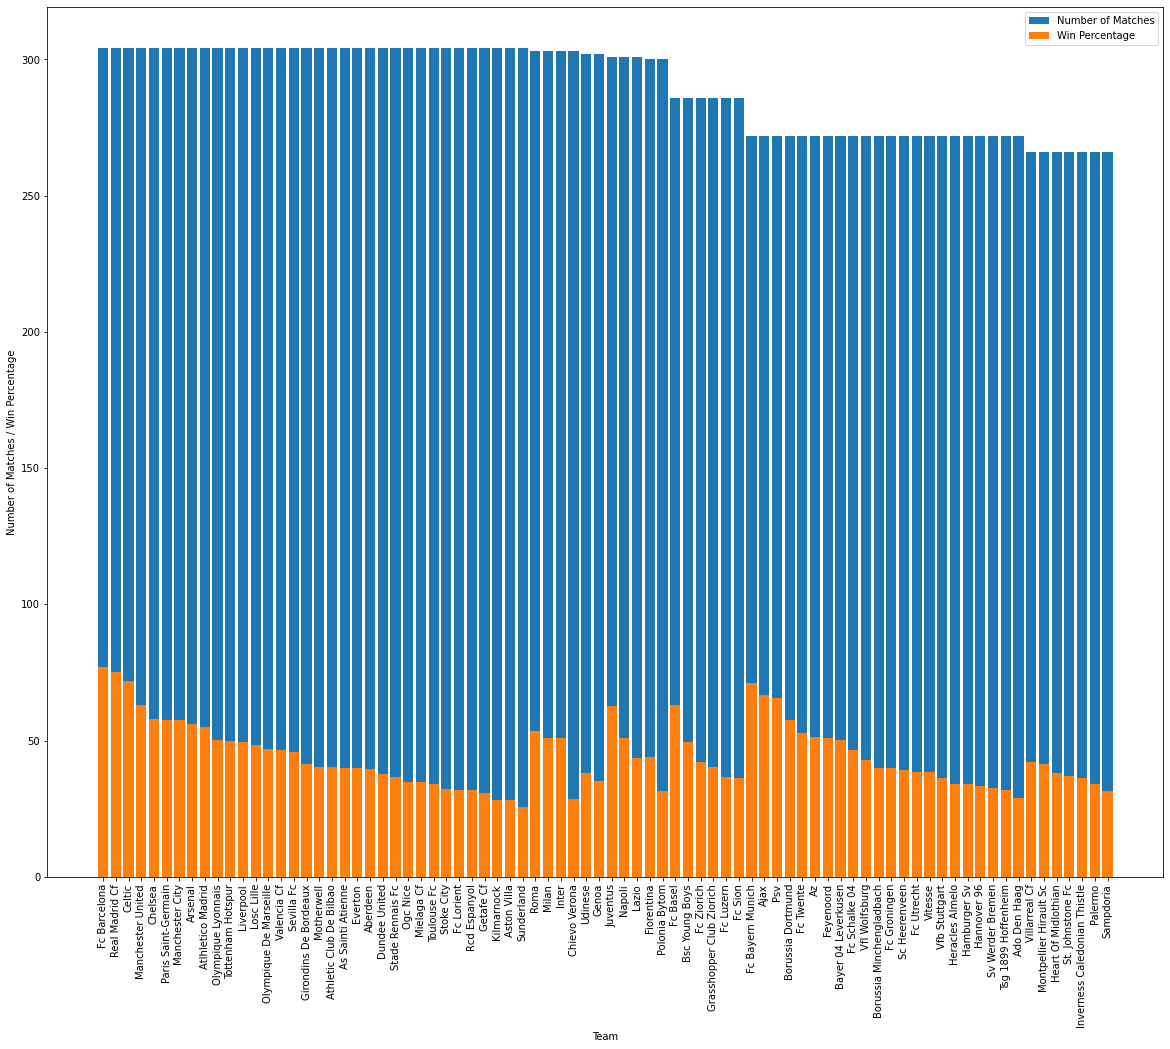

In [320]:
query = """
SELECT t.team_long_name, COUNT(m.match_id) AS num_matches, 
    SUM(CASE WHEN m.home_team_goal > m.away_team_goal AND m.home_team_id = t.team_id THEN 1 
        WHEN m.away_team_goal > m.home_team_goal AND m.away_team_id = t.team_id THEN 1 
        ELSE 0 END) AS num_wins
FROM teams t
LEFT JOIN `Match` m ON t.team_id = m.home_team_id OR t.team_id = m.away_team_id
GROUP BY t.team_long_name
ORDER BY num_matches DESC, num_wins DESC Limit 80;
"""
df = pd.read_sql_query(query, mydb)

# Calculate the win percentage for each team
df['win_percent'] = df['num_wins'] / df['num_matches'] * 100

# Create a bar chart showing the number of matches and win percentage for each team
fig, ax = plt.subplots(figsize=(20, 16))
ax.bar(df['team_long_name'], df['num_matches'], label='Number of Matches')
ax.bar(df['team_long_name'], df['win_percent'], label='Win Percentage')
ax.set_xticklabels(df['team_long_name'], rotation=90)
ax.set_xlabel('Team')
ax.set_ylabel('Number of Matches / Win Percentage')
ax.legend()
plt.show()



